In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
INIT_LR = 0.001
EPOCHS = 25
BS = 32

In [3]:
DIRECTORY = r"C:\Users\ANIKET THAKUR\Desktop\FaceData"
CATEGORIES = ["aniket", "shahnawaz", "tunavi"]

print("[INFO] loading images...")

data = []
labels = []
real_img=[]

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        real_img.append(image)
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)
print('task completed')

[INFO] loading images...
task completed


In [4]:
le = LabelEncoder() 
  
new_label=le.fit_transform(labels) 
labels=to_categorical(new_label)

In [5]:
data = np.array(data, dtype="float32") 
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [6]:
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.30,
                         width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,
                         vertical_flip=True,fill_mode="nearest")

In [7]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,alpha=1.0,
                        input_tensor=Input(shape=(224, 224, 3)))

In [8]:
headModel=baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7),data_format=None,
                             padding='valid')(headModel)
#Flatten the output of our base model to 1 dimension
headModel = Flatten(name="flatten")(headModel)
# Add a fully connected layer with 128 hidden units and ReLU activation
headModel = Dense(128, activation="relu")(headModel)
#Add dropout rate of 0.5 
headModel = Dropout(0.5)(headModel)
# Add a final softmax layer for classification
headModel = Dense(3, activation="softmax")(headModel)

In [9]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [10]:

for layer in baseModel.layers:
    layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
print("finished compiling")

[INFO] compiling model...
finished compiling


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
print("[INFO] training head...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),
              steps_per_epoch=len(trainX) // BS,
              validation_data=(testX, testY),
              validation_steps=len(testX) // BS,
              epochs=EPOCHS)

[INFO] training head...
Epoch 1/25
30/30 [==============================] - 42s 1s/step - loss: 0.6011 - accuracy: 0.7344 - val_loss: 0.3856 - val_accuracy: 0.7750
Epoch 2/25
30/30 [==============================] - 39s 1s/step - loss: 0.2037 - accuracy: 0.9271 - val_loss: 0.0942 - val_accuracy: 0.9917
Epoch 3/25
30/30 [==============================] - 42s 1s/step - loss: 0.1248 - accuracy: 0.9510 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 4/25
30/30 [==============================] - 39s 1s/step - loss: 0.1122 - accuracy: 0.9615 - val_loss: 0.0548 - val_accuracy: 0.9875
Epoch 5/25
30/30 [==============================] - 42s 1s/step - loss: 0.0894 - accuracy: 0.9667 - val_loss: 0.0488 - val_accuracy: 0.9958
Epoch 6/25
30/30 [==============================] - 40s 1s/step - loss: 0.0785 - accuracy: 0.9740 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 7/25
30/30 [==============================] - 40s 1s/step - loss: 0.0689 - accuracy: 0.9802 - val_loss: 0.0134 - val_accuracy: 1.0

In [12]:
print("[INFO] evaluating network...")
prediction = model.predict(testX, batch_size=BS)

[INFO] evaluating network...


In [13]:
print(prediction.shape)
prediction

(240, 3)


array([[5.64838519e-05, 1.18153293e-05, 9.99931693e-01],
       [9.99998689e-01, 1.24663632e-06, 1.19768927e-07],
       [2.01351868e-04, 6.24382665e-05, 9.99736249e-01],
       [7.19674631e-07, 6.14025157e-06, 9.99993086e-01],
       [2.38886082e-06, 8.42479153e-07, 9.99996781e-01],
       [7.97134419e-07, 9.99290228e-01, 7.08964828e-04],
       [3.37041965e-05, 3.26253212e-05, 9.99933720e-01],
       [9.99962568e-01, 5.27632302e-08, 3.74578849e-05],
       [1.92952683e-07, 9.99990821e-01, 8.97279187e-06],
       [3.63250147e-04, 5.39899738e-05, 9.99582708e-01],
       [9.99990821e-01, 1.25767642e-07, 9.03648561e-06],
       [1.83127938e-07, 2.89575360e-06, 9.99996901e-01],
       [3.15522925e-06, 9.99169827e-01, 8.27121257e-04],
       [9.86346560e-09, 9.99995112e-01, 4.84529619e-06],
       [2.86793988e-06, 1.66874288e-05, 9.99980450e-01],
       [1.17586137e-06, 9.99628544e-01, 3.70259600e-04],
       [9.99998927e-01, 2.93440564e-07, 8.73940451e-07],
       [3.13801022e-04, 3.71994

In [14]:
predIdxs = np.argmax(prediction, axis=1)
print(predIdxs.shape)
predIdxs


(240,)


array([2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0,
       1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2],
      dtype=int64)

In [15]:
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=le.classes_))

              precision    recall  f1-score   support

      aniket       1.00      1.00      1.00        80
   shahnawaz       1.00      1.00      1.00        80
      tunavi       1.00      1.00      1.00        80

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [16]:
print("saving mask detector model...")
model.save("face_recog_ani_shah_tuna.model", save_format="h5")


saving mask detector model...


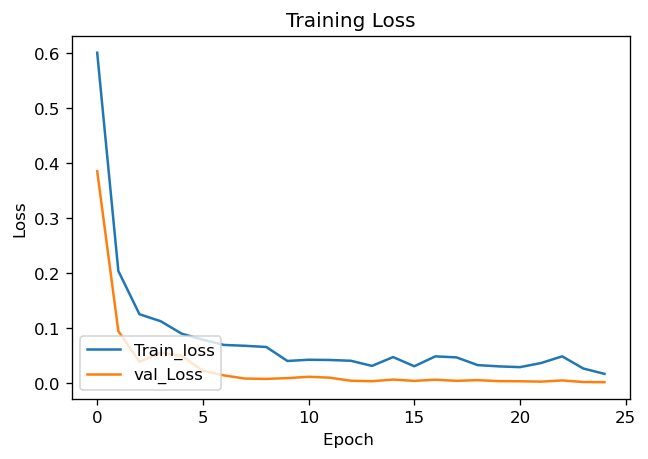

In [17]:
N = EPOCHS
plt.figure(dpi=120)
plt.plot(range(0, N), H.history["loss"], label="Train_loss")
plt.plot(range(0,N),H.history["val_loss"], label="val_Loss")
plt.title("Training Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()




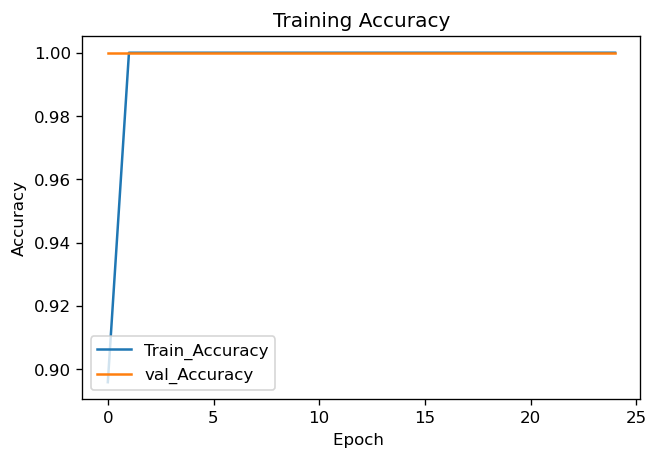

In [36]:
N = EPOCHS
plt.figure(dpi=120)
plt.plot(range(0, N), H.history["accuracy"], label="Train_Accuracy")
plt.plot(range(0,N),H.history["val_accuracy"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

